## Install and load packages

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
%%capture
!pip install -r ../requirements.txt


In [2]:
import pandas as pd
from statistics import mean
import matplotlib.pyplot as plt
%matplotlib inline
from pmlb import fetch_data
from statistics import mean

In [3]:
df = pd.read_csv('../Data/compas-scores-two-years.csv')
dd = df[['sex', 'age', 'age_cat', 'race', 'decile_score', 'priors_count', 'score_text', 'c_charge_degree', 'two_year_recid', 'is_recid', 'days_b_screening_arrest',
        'juv_fel_count', 'juv_misd_count']].replace({
    'Greater than 45':'Above_FourtyFive',
    'Less than 25':'Below_TwentyFive',
    '25 - 45': 'Between_25_45',
    'M':'Misdemeanor',
    'F':'Felony'
})

dd = dd[(dd.days_b_screening_arrest <= 30) & (dd.days_b_screening_arrest >=-30)]\
        .drop(columns=['days_b_screening_arrest','is_recid', 'two_year_recid', 'age_cat'])\
        .assign(score_factor = lambda x: x['score_text'].map(lambda y: 1 if y=='Low' else 0))
dd = dd[(dd.race=='African-American') | (dd.race=='Caucasian')]
dd = dd.assign(
    race = lambda x: (x['race'] == 'Caucasian')*1,
    sex = lambda x: (x.sex == 'Male')*1,
    felony = lambda x: (x.c_charge_degree == 'Felony')*1
         ).drop(columns = ['score_text', 'c_charge_degree'])

X = dd.drop(columns = ['score_factor', 'decile_score'])
#Z = dd.race
y = dd.score_factor
sens_var='race'
sensitive_value=0 
y.value_counts(normalize=True)
good_outcome=1 #low risk factor

In [4]:
%run "../clean_functions.py"

pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[inFairness]'
pip install 'aif360[Reductions]'
pip install 'aif360[FairAdapt]'


In [5]:
model='xgb'
test_results, val_results=run_constraints_xgb(X,y, sens_var, sensitive_value)
test_metrics=run_all_results_clean(test_results, val_results, good_outcome)

Run biased model
The AUC of the biased model (validation set) is: 0.8198734013931376
The AUC of the biased model (test set) is: 0.8117330089049162
The AUC of the biased model for the protected group (validation set) is: 0.8066671428293152
The AUC of the biased model for the privileged group (validation set) is: 0.7988260143432557
The AUC of the biased model for the protected group (test set) is: 0.79330747036806
The AUC of the biased model for the privileged group (test set) is: 0.7968505094043886
Calculate demographic parity


100%|██████████| 100/100 [00:00<00:00, 139.19it/s]


Calculate equality of opportunity


100%|██████████| 100/100 [00:34<00:00,  2.88it/s]


Calculate accuracy


100%|██████████| 100/100 [00:00<00:00, 752.06it/s]


Calculate precision


100%|██████████| 100/100 [00:00<00:00, 588.76it/s]


Calculate recall


100%|██████████| 100/100 [00:00<00:00, 1132.57it/s]


In [6]:
print('Percentage of people in the protected group {}'.format(test_results.protected.mean()))
print('Percentage of people with the target value {}'.format(test_results.target.mean()))
print('The base rate disparity is {}'.format(test_results[test_results.protected==False].target.value_counts(normalize=True)[good_outcome] - test_results[test_results.protected==True].target.value_counts(normalize=True)[good_outcome]))


Percentage of people in the protected group 0.6015151515151516
Percentage of people with the target value 0.5212121212121212
The base rate disparity is 0.24602771738609913


In [17]:

# cost rounded to 3 digits after the comma
print('precision')
print('The average cost of fairness (DP) is {:.3f}'.format(mean([a - b for a, b in zip(test_metrics['prec_unfair'], test_metrics['prec_dp'])])))
print('The average cost of fairness (EO) is {:.3f}'.format(mean([a - b for a, b in zip(test_metrics['prec_unfair'], test_metrics['prec_eo'])])))
print('recall')
print('The average cost of fairness (DP) is {:.3f}'.format(mean([a - b for a, b in zip(test_metrics['rec_unfair'], test_metrics['rec_dp'])])))
print('The average cost of fairness (EO) is {:.3f}'.format(mean([a - b for a, b in zip(test_metrics['rec_unfair'], test_metrics['rec_eo'])])))
print('accuracy')
print('The average cost of fairness (DP) is {:.3f}'.format(mean([a - b for a, b in zip(test_metrics['acc_unfair'], test_metrics['acc_dp'])])))
print('The average cost of fairness (EO) is {:.3f}'.format(mean([a - b for a, b in zip(test_metrics['acc_unfair'], test_metrics['acc_eo'])])))

precision
The average cost of fairness (DP) is 0.026
The average cost of fairness (EO) is 0.014
recall
The average cost of fairness (DP) is 0.016
The average cost of fairness (EO) is 0.007
accuracy
The average cost of fairness (DP) is 0.017
The average cost of fairness (EO) is 0.008


In [18]:
# save results
import pickle

with open(f'Results/Compas_test_results.pkl', 'wb') as f:
    pickle.dump(test_results, f)
with open(f'Results/Compas_test_metrics.pkl', 'wb') as f:
    pickle.dump(test_metrics, f)

## Read results and visualize 

In [11]:
# read results
import pickle
test_results = pd.read_pickle('Results/Compas_test_results.pkl')
test_metrics = pd.read_pickle('Results/Compas_test_metrics.pkl')

In [5]:
%run "../visualisations.py"

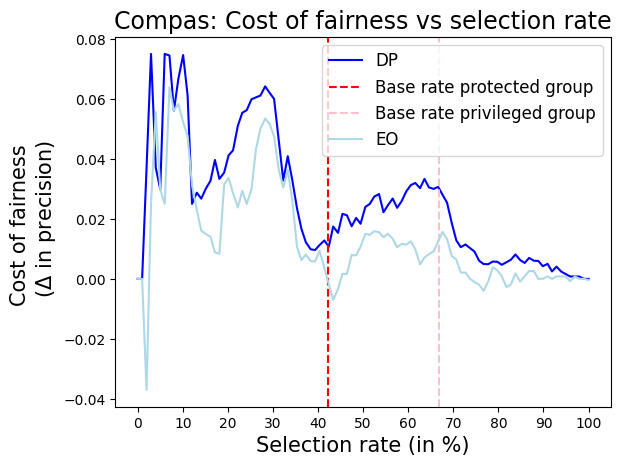

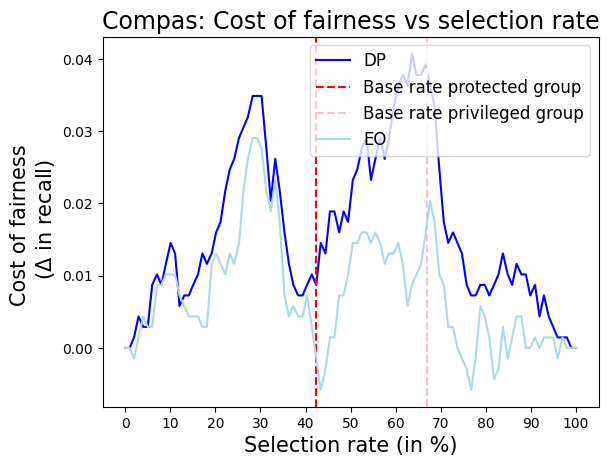

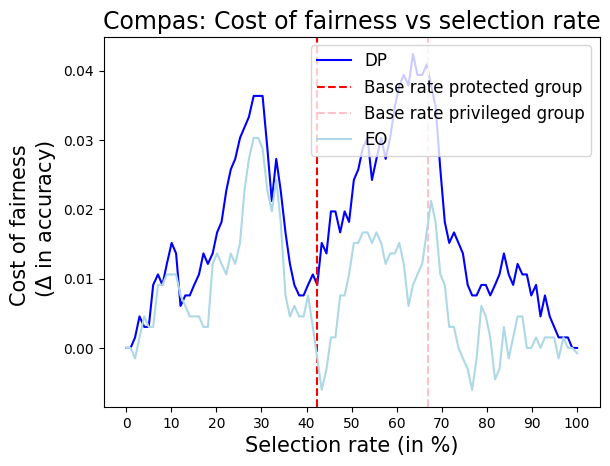

In [12]:
C_list=[i for i in np.linspace(start=1, stop=len(test_results), num=100, dtype=int)]
dataset='Compas'
plot_cost(test_metrics['prec_unfair'],test_metrics['prec_dp'],C_list, test_results, 'precision', 'DP', dataset, test_metrics['prec_eo'], 'EO')   
plot_cost(test_metrics['rec_unfair'],test_metrics['rec_dp'],C_list, test_results, 'recall', 'DP', dataset, test_metrics['rec_eo'], 'EO') 
plot_cost(test_metrics['acc_unfair'],test_metrics['acc_dp'],C_list, test_results, 'accuracy', 'DP', dataset, test_metrics['acc_eo'], 'EO') 